# Ejercicio 1 - Heladería

Se quiere calcular la catidad de clientes que tendrá una heladería dependiendo de la temperatura exterior.

- Si la temperatura es <b>alta</b> entonces la heladería estará <b>llena</b>
- Si la temperatura es <b>moderada</b> entonces la heladería estará <b>ocupada</b>
- Si la temperatura es <b>baja</b> entonces la heladería estará <b>tranquila</b>

El número máximo de clientes para el local es de 35 clientes.
Definir los rangos de pertenencias para los antecedentes y consecuentes.

In [1]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt

## Antecendentes

Definir y graficar los antecedentes para el problema.

/usr/local/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


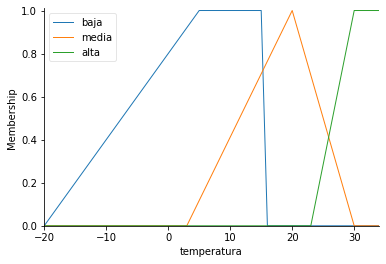

In [2]:
temp = ctrl.Antecedent(np.arange(-20,35,1),"temperatura")
temp['baja'] = fuzz.trapmf(temp.universe, [-20, 5, 15,15])
temp['media'] = fuzz.trimf(temp.universe, [3, 20, 30])
temp['alta'] = fuzz.trapmf(temp.universe, [23, 30, 35,35])
temp.view()


## Consecuentes

Definir y gráficar los antecedentes para el problema.

/usr/local/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


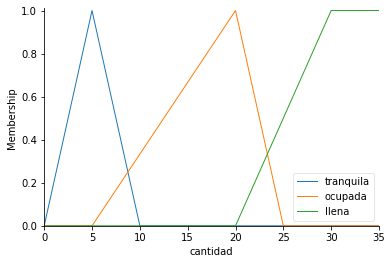

In [3]:
cantidad = ctrl.Consequent(np.arange(0, 36, 1), 'cantidad')
cantidad['tranquila'] = fuzz.trimf(cantidad.universe, [0, 5, 10])
cantidad['ocupada'] = fuzz.trimf(cantidad.universe, [5, 20, 25])
cantidad['llena'] = fuzz.trapmf(cantidad.universe, [20, 30, 35, 35])


cantidad.view()

## Reglas

Definir las reglas para el sistema.

In [6]:
cantidad.defuzzify_method = 'som'
rules = []
rules.append(ctrl.Rule( temp['baja'], cantidad['tranquila']  ) )
rules.append(ctrl.Rule( temp['media'], cantidad['ocupada'] ) )
rules.append(ctrl.Rule( temp['alta'], cantidad['llena'] ) )

## Simulación

Simular y graficar la salida del sistema para las siguientes temperaturas.
 - -10º
 - 0º
 - 10º
 - 14º
 - 20º
 - 33 º

-10º => Ocupación:2.0
0º => Ocupación:4.0
10º => Ocupación:5.0
14º => Ocupación:5.0
20º => Ocupación:20.0
33º => Ocupación:30.0


/usr/local/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


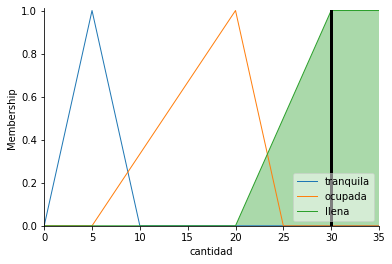

In [7]:
ctrSys = ctrl.ControlSystem(rules)
customers = ctrl.ControlSystemSimulation(ctrSys)

pruebas = [-10,0,10,14,20,33]



for x in pruebas:
    customers.input['temperatura'] = x
    customers.compute()
    print(str(x)+"º => Ocupación:"+str(customers.output['cantidad']))

cantidad.view(sim=customers)